In [17]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib as plt
from matplotlib import pyplot

In [8]:
class BernoulliBandit :
    def __init__ (self , means):
        for i in means:
            assert(i <= 1 and i >= 0)
        self.means = means
        self.k = len(means)
        self.best_mean = max(means)
        self.regret = 0
# Function should return the number of arms
    def get_K( self ):
         return self.k
# Accepts a parameter 0 <= a <= K -1 and returns the
# realisation of random variable X with P(X = 1) being
# the mean of the (a +1) th arm .
    def pull (self , a):
        self.regret += (self.best_mean - self.means[a])
        return bernoulli.rvs(self.means[a], size=1)

    def get_regret ( self ):
        return self.regret

In [9]:
def follow_the_leader(n, bandit):
    actions = np.zeros(shape=n)
    # for each arm we keep track of the average so far and number of times pulled
    averages = np.zeros((bandit.k, 2))
    for t in range(n):     #pull each arm once
        if t<bandit.k:
            actions[t] = t  #pull the arms in order
            averages[(t,0)] = bandit.pull(t)
            averages[(t, 1)] = 1
        else:
            max_avg_index = np.argmax(averages, axis = 0)[0]
            actions[t] = max_avg_index
            averages[max_avg_index][0] = (averages[max_avg_index][0] * averages[max_avg_index][1] + bandit.pull(max_avg_index)) / (averages[max_avg_index][1] +1)
            averages[max_avg_index][1] += 1
    return actions

In [10]:
##exercise 4.11
regrets = np.empty(1000)
for i in range(1000):
    bandit = BernoulliBandit([0.5, 0.6])
    follow_the_leader(100, bandit)
    regrets[i] = bandit.get_regret()
regrets

array([ 0.5, 48.5,  0.5,  0.5, 49.5, 26. ,  0.5,  0.5, 43.5,  0.5, 49.5,
        0.5,  1. , 49.5, 48.5, 49.5,  1.5, 47.5, 49.5, 49.5, 49.5, 49.5,
       48.5,  0.5, 49.5, 14. ,  0.5,  0.5,  0.5,  0.5,  0.5, 49.5,  2. ,
       29.5, 46.5, 49.5, 49.5, 49.5, 49.5,  6. ,  1. ,  0.5, 49.5,  0.5,
       49.5, 44. , 38. , 49.5,  5. , 49.5,  0.5,  0.5,  0.5,  2.5, 49.5,
        0.5,  0.5, 48.5, 49. , 49.5, 49.5, 49.5,  0.5,  0.5, 49.5, 49.5,
       48.5,  0.5,  0.5, 49.5,  0.5,  1. ,  3.5, 49.5, 49. , 49.5, 49.5,
        0.5,  0.5, 49.5,  1. , 34. ,  0.5, 49.5, 49.5,  0.5,  2.5,  0.5,
        5.5, 46. , 49.5, 49.5,  0.5,  1. , 49.5, 12.5, 49.5,  7. , 49.5,
       49.5, 49.5,  1. ,  2.5, 49. ,  0.5,  0.5, 49.5,  1. , 49.5, 49.5,
       49.5, 49.5,  0.5,  8. ,  1.5, 49.5, 47.5,  2.5, 49.5,  0.5,  2. ,
       49.5,  0.5,  2. ,  0.5,  0.5,  0.5, 49.5,  1.5,  0.5,  0.5, 49.5,
        0.5,  0.5, 49.5, 49.5,  0.5, 49.5, 49.5, 49.5,  0.5, 49.5, 48.5,
       49.5,  0.5,  0.5, 49.5,  2. ,  0.5, 45.5,  1

(array([421.,  31.,  13.,   9.,   5.,   5.,   2.,   4.,  10., 500.]),
 array([ 0.5,  5.4, 10.3, 15.2, 20.1, 25. , 29.9, 34.8, 39.7, 44.6, 49.5]),
 <BarContainer object of 10 artists>)

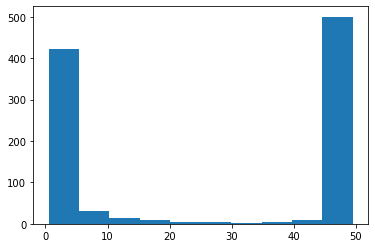

In [18]:
pyplot.hist(regrets)
##follow the leader commits too soon

In [27]:
avg_regrets = np.empty(10)
for n in range(100, 1001, 100):
    regrets = np.empty(1000)
    for i in range(1000):
        bandit = BernoulliBandit([0.5, 0.6])
        follow_the_leader(n, bandit)
        regrets[i] = bandit.get_regret()
    avg_regrets[np.array(n/100, dtype = 'int') - 1] = np.mean(regrets)

In [28]:
avg_regrets

array([ 24.9615,  50.0375,  72.6245,  99.7645, 124.3495, 147.9825,
       171.62  , 198.7735, 220.38  , 235.4495])

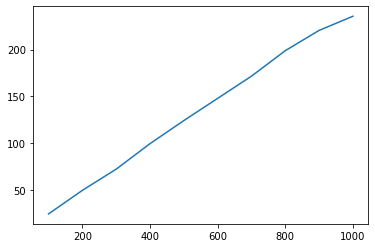

In [30]:
pyplot.plot(range(100,1001, 100), avg_regrets)